In [32]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import time

In [3]:
img = np.ones((600, 1200, 3), np.uint8)*255

cv2.line(img, (50, 100), (300, 120), (0,0, 255), 5, cv2.LINE_AA)
cv2.arrowedLine(img, (50, 120), (300, 140), (0,0, 255), 5, cv2.LINE_AA)
cv2.rectangle(img, (50, 140), (300, 300), (255, 0, 0), 5, cv2.LINE_AA)
cv2.rectangle(img, (70, 160, 210, 120), (0, 255, 0), -1)
cv2.circle(img, (600, 300), 100, (123, 56, 56), 10, cv2.LINE_AA)
cv2.ellipse(img, (600, 300), (50, 120), -20, 0, 360, (0, 0, 255), 10, cv2.LINE_AA)
cv2.putText(img, 'Hello opencv!', (600, 100), cv2.FONT_HERSHEY_TRIPLEX,
            2, (0, 0, 255), 1, cv2.LINE_AA)


cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
src = cv2.imread('./fig2/cow.png')
dst = cv2.imread('./fig2/green.png')

src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
h, w = src.shape[:2]
dst_crop = dst[300:300+h, 300:300+w]


ret, mask = cv2.threshold(src_gray, 240, 255, cv2.THRESH_BINARY_INV)

cv2.copyTo(src, mask, dst_crop)
# cv2.imshow('src', src)
cv2.imshow('dst', dst)
# cv2.imshow('mask', mask)

cv2.waitKey()
cv2.destroyAllWindows()


In [12]:
img = cv2.imread('./fig2/cat.bmp')
h, w = img.shape[:2]
img_resize = cv2.resize(img, (int(w*2), int(h*2)), interpolation=cv2.INTER_LINEAR)

cv2.imwrite('img_resize.jpg', img_resize)

cv2.imshow('img_resize', img_resize)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
## trackbar

def call_track(pos):
    img_1[:] = img_2 * pos
    cv2.imshow('img', img_1)

img = cv2.imread('./fig2/puppy.bmp', 0)
img_1 = np.ones_like(img)
img_2 = img_1.copy()

cv2.imshow('img', img_1)
cv2.createTrackbar('level', 'img', 0, 255, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

In [31]:
## trackbar

def call_track(pos):
    img_1[:] = img_2 * pos
    cv2.imshow('img', img_1)

img = cv2.imread('./fig2/puppy.bmp', 0)
img_1 = np.ones_like(img)
img_2 = img.copy() / 255

cv2.imshow('img', img_1)
cv2.createTrackbar('level', 'img', 0, 255, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

In [106]:
img = cv2.imread('./fig2/puppy.bmp', 0)

t1 = time.time()
img_1 = cv2.GaussianBlur(img, (0, 0), 3)

t2 = time.time()

cv2.imshow('img', img)
cv2.imshow('img_1', img_1)

cv2.waitKey()
cv2.destroyAllWindows()

print((t2-t1)*1000, 'ms')

1.9693374633789062 ms


In [59]:
src = cv2.imread('fig3/lenna.bmp')

dst = np.clip(src + 100., 0 , 255).astype(np.uint8)
# dst = cv2.add(src, (100, 100, 100, 0))

print(dst.dtype)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

uint8


In [70]:
src1 = cv2.imread('fig3/lenna256.bmp', 0)
src2 = np.zeros_like(src1)
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

fig, ax = plt.subplots(2, 3, figsize = (12, 6))



cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

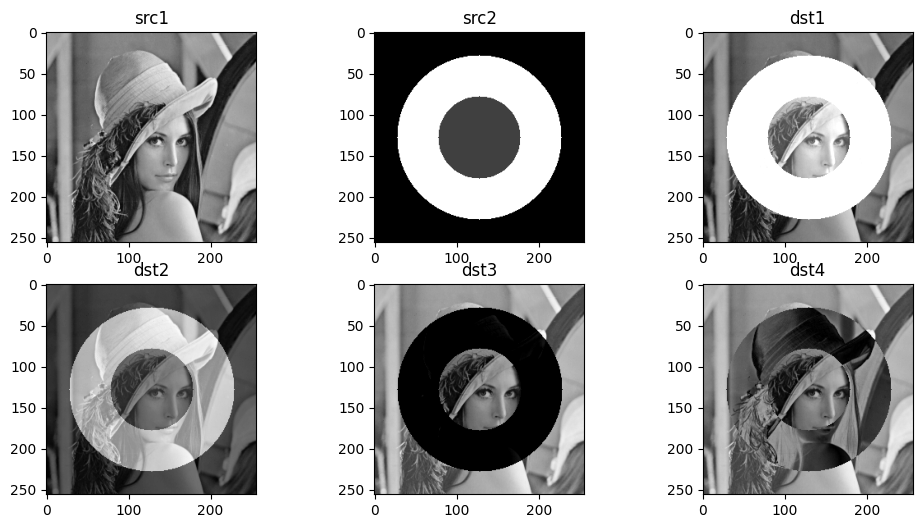

In [73]:
images = [src1, src2, dst1, dst2, dst3, dst4]
titles = ['src1', 'src2', 'dst1', 'dst2', 'dst3', 'dst4']

fig, ax = plt.subplots(2, 3, figsize=(12, 6))

for i in range(2):
    for j in range(3):
        ax[i, j].imshow(images[i * 3 + j], cmap='gray')
        ax[i, j].set_title(titles[i * 3 + j])

plt.show()


In [117]:
src = cv2.imread('./fig2/ddolgi.png')
src = cv2.resize(src, (500, 800), interpolation=cv2.INTER_AREA)
alpha = cv2.imread('./fig2/imgbin_hat.png', cv2.IMREAD_UNCHANGED)
alpha = cv2.resize(alpha, (400, 500), interpolation=cv2.INTER_AREA)

# 회전 각도를 설정합니다.
angle = -15

# 이미지 중심점을 계산합니다.
height, width = alpha.shape[:2]
center = (width / 2, height / 2)

# 회전 변환 매트릭스를 생성합니다.
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# 이미지를 회전합니다.
alpha = cv2.warpAffine(alpha, rotation_matrix, (width, height))

h, w = alpha.shape[:2]
sunglass = alpha[:, :, 0:-1]
mask = alpha[:, :, -1]

src_crop = src[280:280+h, 70:70+w]
src_save = src_crop.copy()

src2 = cv2.copyTo(sunglass, mask, src_crop)
# dst2 = cv2.addWeighted(src_save, 0.5, src_crop, 0.5, 0)

# cv2.imshow('src', src)
# cv2.imshow('alpha', alpha)
cv2.imshow('src_crop', src_crop)
cv2.imshow('src_save', src_save)
# cv2.imshow('mask', mask)
# cv2.imshow('sunglass', sunglass)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

In [119]:
# src1과 src2가 중첩될 소스 이미지로 가정합니다.
a = 0.0  # 초기 알파값

# 알파값을 서서히 증가시키고 이미지를 중첩하는 반복문을 생성합니다.
while a <= 1.0:
    blended = cv2.addWeighted(src_save, 1-a, src_crop, a, 0)

    # 이미지를 화면에 표시하거나 저장할 수 있습니다.
    cv2.imshow('Blended Image', blended)
    cv2.waitKey(100)  # 잠시 대기하여 시각적인 효과를 확인합니다.

    a += 0.05  # 알파값을 증가시킵니다.

cv2.waitKey()
cv2.destroyAllWindows()

In [129]:
src = cv2.imread('./fig3/flowers.jpg')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

b, g, r = cv2.split(src)
h, s, v = cv2.split(src_hsv)
# b_add = b + 50

# dst = cv2.merge((b_add, g, r))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)

cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)

cv2.waitKey()
cv2.destroyAllWindows()

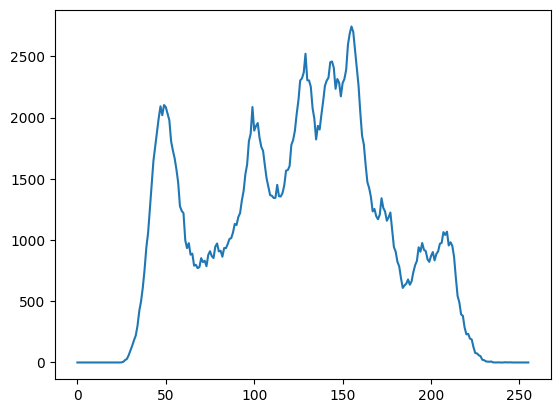

In [131]:
src = cv2.imread('./fig3/lenna.bmp', 0)

hist = cv2.calcHist([src], [0], None, [256], [0, 256])

cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

plt.plot(hist)
plt.show()

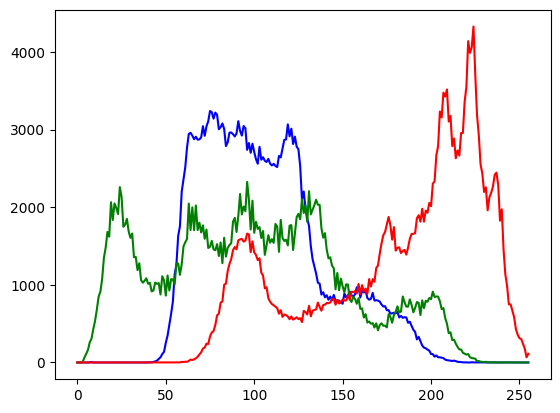

In [133]:
src = cv2.imread('./fig3/lenna.bmp')

hist_b = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([src], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([src], [2], None, [256], [0, 256])

cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

plt.plot(hist_b, 'b')
plt.plot(hist_g, 'g')
plt.plot(hist_r, 'r')
plt.show()